# Solving the Benchmark Model

At the start of Lecture 8, we consider the Benchmark Model - a model universe that contains all the energy density components that we currently know or believe may exist within the real Universe: matter, radiation (photons), dark energy, and - possibly - curvature. This was presented as a differential equation describing the rate of change of the scale factor (i.e., a) with respect to time (i.e., da/dt):

$\frac{da}{dt} = \int H_0(\frac{\Omega_{\rm p,0}}{a^2} + \frac{\Omega_{\rm m,0}}{a}+\Omega_{\rm d,0}{a^2}+(1-\Omega_0))^{1/2}$

This differential equation can't be solved analytically, but it is easy to solve numerically.

In this notebook, I use off-the-shelf python modules to numerically solve the Benchmark Model, starting with determining how the scale factor changes with time.

## How the scale factor, a, changes over time
First, load the python modules that we'll be using:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.rcParams.update({'font.size':15})

Define a set of energy densities in terms of the critial density (i.e., as they are written in the lecture slides):

In [19]:
om_m0 = 0.31
om_p0 = 9e-5
om_d0 = 0.69
om_0 = 1.00
H0 = 69.6
c = 3e5

Define a vector to include values for the scale factor. We'll do this in log space, enabling the scale factor to cover a large dynamic range:

In [20]:
a = np.logspace(-7,3)

Although not necessary for solving the differential equation, it's insightful to plot da/dt as a function of scale factor:

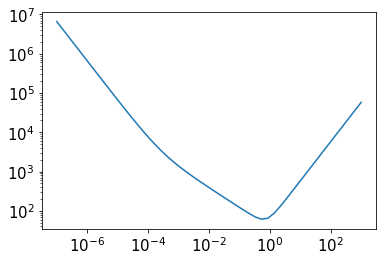

In [21]:
da_dt = H0*((om_p0/a**2 + om_m0/a + om_d0*a**2 + (1-om_0))**0.5)
plt.plot(a, da_dt)
plt.xscale('log')
plt.yscale('log')
plt.show()

The above plot shows how the rate of change of the scale factor increases as the scale factor increases. If it were describing blowing up a balloon, it would describe the *rate* at which the balloon expands as a function of the balloon's diamater.

To solve the differential equation, it needs to be rearranged so that all terms containing the scale factor are on the left hand side of the equation (including the da):

$\frac{da}{(\frac{\Omega_{\rm p,0}}{a^2} + \frac{\Omega_{\rm m,0}}{a}+\Omega_{\rm d,0}{a^2}+(1-\Omega_0))^{1/2}} = H_0 dt$

Solving this to relate scale factor to time requires us to integrate both sides between 0 and $\alpha$ on the left, and 0 and $t$ on the right, where $\alpha$ corresponds to the scale factor at time $t$:

$\int_0^\alpha \frac{da}{(\frac{\Omega_{\rm p,0}}{a^2} + \frac{\Omega_{\rm m,0}}{a}+\Omega_{\rm d,0}{a^2}+(1-\Omega_0))^{1/2}} = H_0 t$

Also, define it as a python function in a in order to integrate it numerically:

In [22]:
def a_int(a):
    return (om_p0/a**2 + om_m0/a + om_d0*a**2 + (1-om_0))**-0.5

Now we need to integrate the above function from between 0 and various values of scale factor, $\alpha$:

In [23]:
H0t = np.zeros(50)
for i, alpha in enumerate(a):
    H0t[i] = (integrate.quad(a_int, 0, alpha))[0]

The above integral gives t at each value of scale factor (i.e., t(a)) as opposed to the more familiar "scale factor at different times" (i.e., a(t)). However, this is not a problem with numerical vectors - we simply have to state which value goes on the x-axis (t) and which goes on the y-axis (a).

Additionally, it's important that we normalise to make sure that $t_0$ corresponds to a = 1 (i.e., by definition, the scale factor must equal 1 at $t_0$):

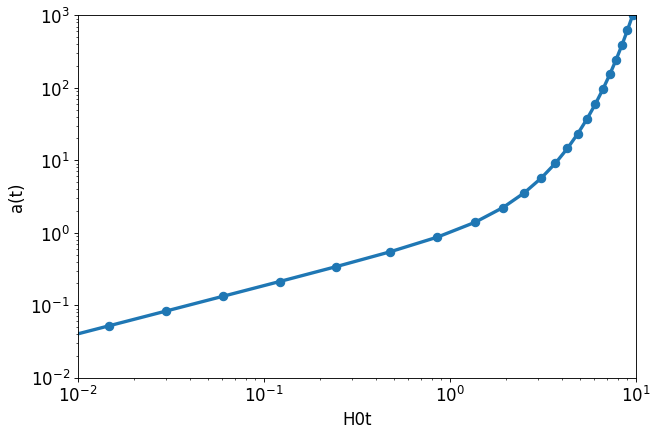

In [24]:
norm = (integrate.quad(a_int, 0., 1.))[0]
nH0t = H0t/norm

fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(nH0t,a, lw=3, marker='.',markersize=15)
plt.xlim(0.01,10)
plt.ylim(0.01,1000)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('a(t)')
plt.xlabel('H0t')
plt.show()

The above plot shows the scale factor at various times, i.e., a(t). In other words, it shows the relative size of the Benchmark Model universe (i.e., relative to its current size) at different times. $H_0 t=1$ corresponds to now, $H_0 t=0.1$ corresponds to when the universe was roughly 1/10th its current age, and $H_0 t=10$ correponds to when the universe will be 10 times its current age (bear in mind that the plot axes are in log-scale).  

## Proper distances at different redshifts
Having calculated a(t), it's now possible to calculate all other relevant values such as proper distances and time of emission for a galaxy at a given redshift, z. The current proper distance is given by:

$d_p(t_0) = c\int_{t_{\rm em}}^{t_{\rm ob}} \frac{dt}{a(t)}$

First, define a redshift at which to calculate the proper distance:

In [25]:
z = 0.8

From this redshift, calculate the scale factor at the time of emission using $1+z = \frac{1}{a(t_{\rm em})}$:

In [26]:
a_tem = 1./(1+z)

Next, numerically integrate a(t) between $H_0 t_{\rm em}$ and $H_0 t_{\rm ob}$. The latter is, by definition, equal to 1. This time, since a(t) is described by a vector rather than an analytic expression, we can't use the "quad" approach as before. Instead, use the more traditional "sum the area under the curve" methods such as the Trapezium Rule or the more precise Simpson's Rule.

To use this approach, sum up the area bounded by the curve described by 1/a(t) between $t_{\rm em}$ and $\tau = t_{\rm ob} = t_0$. In other words, this area:

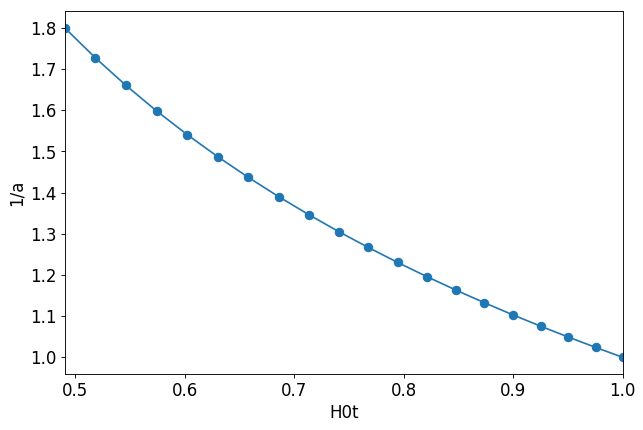

In [27]:
a = np.linspace(a_tem, 1., 20)
a_inv = 1./a
H0t = np.zeros_like(a)
for i, alpha in enumerate(a):
    H0t[i] = (integrate.quad(a_int, 0, alpha))[0]

#Remember to normalise so a=1 at t=t_obs=t0
nH0t = H0t/(integrate.quad(a_int, 0, 1))[0]

fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(nH0t, a_inv, marker='.',markersize=15)
plt.xlim(nH0t[0], 1)
plt.xlabel('H0t')
plt.ylabel('1/a')
plt.show()

Use Simpson's Rule to sum up this area. Thankfully, there's a Python module to do this:

In [28]:
from scipy.integrate import simps
dp_c = simps(a_inv, nH0t)

The above gives the current proper distance in units of ${H_0/c}$. Convert to Mpc using:

In [29]:
dp = dp_c/(H0/c)
print(dp)

2923.18395556


To calculate how current proper distance changes as a function of redshift, simply define a vector of redshifts and calculate the proper distance at each redshift using a for-loop:

In [30]:
z = np.logspace(-2.2,np.log10(5000))
a_tem = 1./(1+z)

from scipy.integrate import simps
dp_c = np.zeros(50)

for i, alpha in enumerate(a_tem):
    a = np.linspace(alpha, 1., 100)
    a_inv = 1./a
    
    H0t = np.zeros(100)
    for j, beta in enumerate(a):
        H0t[j] = (integrate.quad(a_int, 0, beta))[0]
    
    #Remember to normalise so a=1 at t=t_obs=t0
    nH0t = H0t/(integrate.quad(a_int, 0, 1))[0]
    dp_c[i] = simps(a_inv, nH0t)

Now, plot proper distance as a function of redshift:

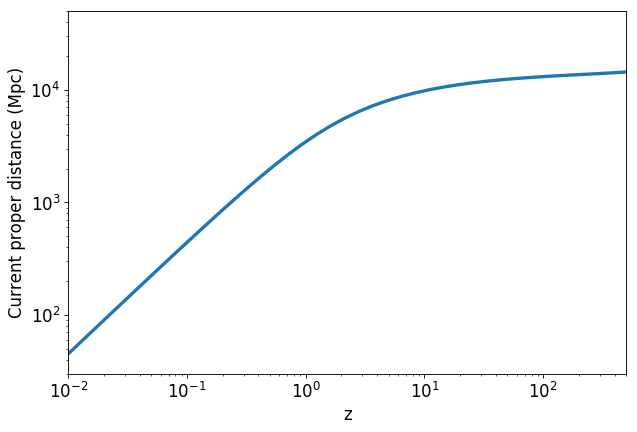

In [38]:
fig=plt.figure(figsize=(9, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(z, dp_c/(H0/c), lw=3, label="Benchmark") #Benchmark
#plt.plot(z, c*z/H0, ':', lw=3, label="DE-only") #DE-only
#plt.plot(z, c*z/(H0*(1+z)),'-.', lw=3, label="Radiation-only") #Radiation-only
#plt.plot(z, (2*c/H0)*(1.-(1.+z)**-0.5),'--', lw=3, label="Matter-only") #Matter-only
#plt.plot(z, (c/H0)*np.log(1.+z), '--', lw=3, label="Empty") #Empty

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.xlim(0.01,500)
plt.ylim(30,50000)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('Current proper distance (Mpc)')

plt.show()

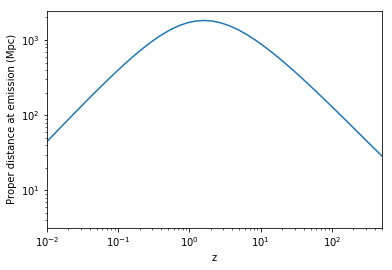

In [15]:
plt.plot(z, dp_c/((H0/c)*(1+z)))
plt.xlim(0.01,500)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('Proper distance at emission (Mpc)')
plt.show()